## Ans_1
1. a) Can you perform a simple linear regression (from scratch) analysis to determine if there is a relationship between the<br>      phone's  pixel density and its rating using line search approach? <br>
   b) What is the slope and intercept of the regression line, and what is the Mean Squared Error (MSE) for this model?<br>
   c) Plot Cost function (both as surface as well as contour) and best fit line.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('mobile_data (1).csv')

In [3]:
X=df['Pixel Density']
Y=df['Rating']
#Normalising the Feature values and obsevationsy
X=X/max(X)
Y=Y/max(Y)

In [4]:
def J(w):    # Objective Function
    s=0
    for i in range(len(X)):
        s+=(w[0]+w[1]*X[i]-Y[i])**2
    return s/(2*len(X))
def gradJ(w):
    return np.array([sum(w[0]+w[1]*X-Y)/len(X),sum((w[0]+w[1]*X-Y)*X)/len(X)])

In [5]:
#This is the function used in the last LAB Here alpha is fixed
def SteepestDescent(f,gradf,initialGuess=np.array([0,0]),iterations=2000,tolerance=10**-5,StepL=0.001):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        w_0=w_0+StepL*p
        k=k+1
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)
 

In [6]:
w_0,MSE=SteepestDescent(J,gradJ)

minimum value will be: 0.0048307007070939045 at [0.56180986 0.32979233] Number of iterations: 2000


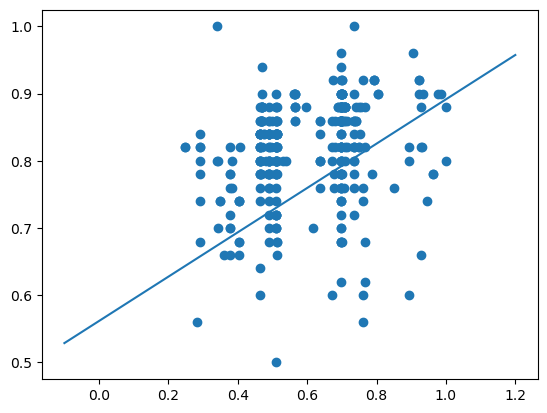

In [9]:
x=np.linspace(-0.1,1.2,100)
def model(x):
    return w_0[0]+w_0[1]*x
plt.scatter(X,Y)
plt.plot(x,model(x))
plt.show()

In [10]:
#Weights and MSE are given here
print('Weights are Intercept-W_0: {} and Slope-W_1: {}'.format(w_0[0],w_0[1]))
X=df['Pixel Density']
Y=df['Rating']
print('MSE:{}'.format(J(w_0)))

Weights are Intercept-W_0: 0.5618098600530326 and Slope-W_1: 0.3297923295247422
MSE:6469.975643924411


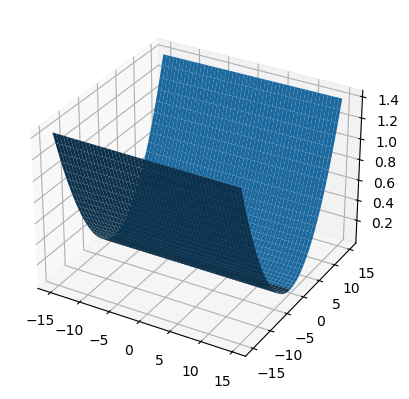

In [11]:
#This is surface plote of the cost function before normalisation
#Surface Plot of the cost function
W0=np.arange(-15,15,0.1)
W1=np.arange(-15,15,0.1)
WW0,WW1=np.meshgrid(W0,W1)
ZZ=J(np.array([WW0,WW1]))
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot_surface(WW0,WW1,ZZ)
plt.show()


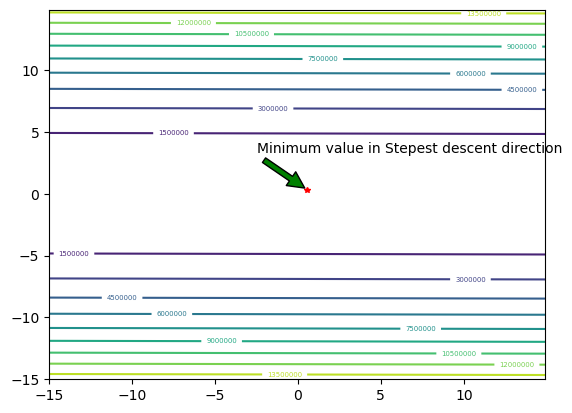

In [12]:
#Contour plot of the cost function before normalisation
cp=plt.contour(WW0,WW1,ZZ,10)
plt.clabel(cp,fontsize=5)
plt.plot(w_0[0],w_0[1],color='red',marker='*',markersize=4)
plt.annotate('Minimum value in Stepest descent direction', xy=(w_0[0], w_0[1]), xytext=(w_0[0]-3, w_0[1]+3),
            arrowprops=dict(facecolor='green',shrink=0.05))
plt.show()

# Conclusion:<br>
We got the model $$y=0.5618098600530326+0.3297923295247422x$$  Since $$MSE=6469.975643924411$$ which is quite large so this simple linear regression does not gives us the good fit.
 